# Utiliser scikit-learn pour mettre en pratique sur le dataset Fashion MNIST et la méthode UMAP

In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("csv_file/fashion-mnist_train.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
!pip install python-mnist
from mnist import MNIST

import matplotlib.pyplot as plt
%matplotlib inline

!pip install seaborn
import seaborn as sns
sns.set(style='white', context='poster')

In [17]:
df_split = df.head(30000)
train = df_split.drop('label', 1)
train_labels = df_split['label']
data = np.array(train, dtype=np.float64)
target = train_labels
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [6]:
!pip install umap-learn

import umap

In [21]:
emb = umap.UMAP(n_neighbors=5).fit_transform(data, y=target)

In [22]:
emb

array([[  0.4441681 ,  -2.8745651 ],
       [  8.180793  ,  -0.26001084],
       [ -1.0300682 ,  -4.4226356 ],
       ...,
       [  8.116136  ,   0.32026184],
       [  7.9092894 ,   1.0888913 ],
       [-10.293814  ,  -3.8114674 ]], dtype=float32)

Text(0.5, 1.0, 'Fashion MNIST Embedded via UMAP')

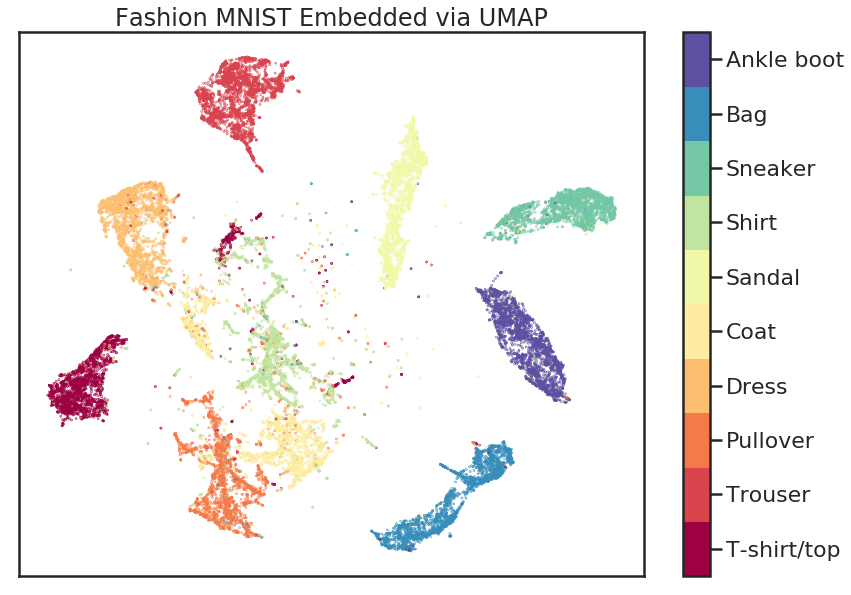

In [25]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*emb.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP')